In [1]:
from typing import Union, Dict, List
import matplotlib.pyplot as plt
from algorithm import GeneticAlgorithm, ControlSystem

from utils import get_config
config: Dict[str, Union[int, List[int]]] = get_config("../genetic-algorithm-config.yaml")

In [2]:
genetic_algorithm = GeneticAlgorithm(config)

best_solutions = []
best_solution = genetic_algorithm.populations[0]

best_fitness = genetic_algorithm.calculate_fitness(0)
best_fitnesses = []

for _ in range(config["genetic-algorithm"]["iteration-number"]):
    for index in range(config["genetic-algorithm"]["population-number"]):
        fitness = genetic_algorithm.calculate_fitness(index)
        if fitness < best_fitness:
            best_solution = genetic_algorithm.populations[index]
            best_fitness = fitness

    best_fitnesses.append(best_fitness)
    best_solutions.append(best_solution)

    genetic_algorithm.produce_next_generation()

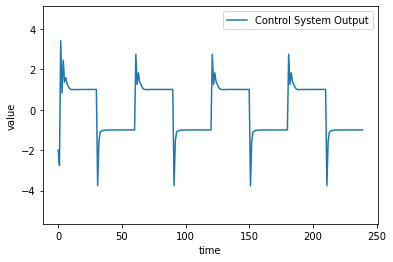

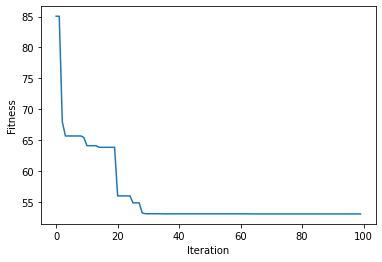

In [3]:
control_system = ControlSystem(
    chromosome=best_solutions[-1],
    config=config["control-system"]
)

control_system.run()

plt.plot(list(range(len(control_system.y))), control_system.y, label="Control System Output")
plt.xlabel("time")
plt.ylabel("value")
plt.ylim(
    1.5 * min(control_system.y),
    1.5 * max(control_system.y),
)
plt.legend()
plt.show()

plt.plot(list(range(len(best_fitnesses))), best_fitnesses)
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()

In [4]:
print(f"P value: {best_solutions[-1].kp}")
print(f"I value: {best_solutions[-1].ki}")
print(f"D value: {best_solutions[-1].kd}")
print(f"eta value: {best_solutions[-1].eta}")

P value: 0.9562212467821026
I value: 0.23921640803614147
D value: 0.019874069789447057
eta value: 0.30001
